# PHASE 3: MODEL TRAINING AND DEPLOYMENT

In the second part, students will
- complete their data exploration stage 
  - (the dataset should be completely ready after appropriate cleansing and transformations; 
  - student is expected to be familiar with all the major patterns and trends in dataset)
- construct their model 
  - (i.e. if it is a regression problem, then students should have their codes ready that are compatible with the dataset; 
  - if it is a neural network implementation, then students should complete at least one successful training, etc.)
- come up with concrete outcomes 
  - (either their initial hypothesis work and why or “these are the outcomes with this much prediction according to method-x, etc.),
- discuss the performance of their model 
  - (in terms of accuracy and/or confidence levels)
- select the best model among alternatives and further tuning the selected model
- deployment of the model for predictive analysis.
- students are encouraged to develop prediction web apps or dashboards using Streamlit or Dash
- elaborate what could be done differently or what can be done next

# PLANNING

DATA PREP
- stratified split 

ML METHODS
- Binary classification
- Multiclass classification
- KNN?

EVALUATION
- Confusion Matrix: TP, FP, TN, FN, FP
  - Then F1 and other metrics

SOURCE
- https://www.learndatasci.com/glossary/binary-classification/ 

# IMPORTS

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# SETUP

### Import DF 
- From the CSV file I created in my Phase 2 (EDA) notebook

In [44]:
# Get current file path
current_path = os.getcwd()
parent_file_path = os.path.dirname(current_path)

# Construct desired file path
file_path = f'{parent_file_path}\\output\\oasis_cross-sectional_filtered.csv'
print('file_path =', file_path)

# Read CSV into Pandas, use the file path defined above, set row 0 as the header, and column 0 as the index
df = pd.read_csv(
    file_path, 
    header = 0, 
    index_col = 0)
df.head()

file_path = c:\Users\GlaDOS\Documents\GitHub\eugene_data606\output\oasis_cross-sectional_filtered.csv


,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


### Rename columns
- Elaborate on the full names according to the metadata descriptions provided

In [45]:
# For reference
df.columns

Index(['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'], dtype='object')

In [46]:
rename_dict = {
    'M/F'    : 'Gender', 
    'Educ'   : 'Education',
    'SES'    : 'Socioeconomic Status',
    'MMSE'   : 'Mini-Mental State Examination',
    'CDR'    : 'Clinical Dementia Rating',
    'eTIV'   : 'Estimated total intracranial volume (mm^3)',
    'nWBV'   : 'Normalized whole brain volume',
    'ASF'    : 'Atlas scaling factor'}

# Rename columns based on provided dictionary
df = df.rename(columns = rename_dict)

# CHECK
df.head()

,Gender,Age,Education,Socioeconomic Status,Mini-Mental State Examination,Clinical Dementia Rating,Estimated total intracranial volume (mm^3),Normalized whole brain volume,Atlas scaling factor
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


# PREPROCESSING

Need to replace the Gender column with dummies

In [47]:
# CHECK
print(f"Gender column has:  {df['Gender'].nunique()} unique values")
print(f"I expect:           2 (for M/F data)")

Gender column has:  2 unique values
I expect:           2 (for M/F data)


Replace the Gender column with the dummy version
- 0 = female
- 1 = male

NOTES:
- The `Gender` column has been renamed to `Gender_M` and moved to the right side of DF
- `drop_first` --> removes the reference column generated by the `get_dummies` command

In [48]:
df = pd.get_dummies(
    df, 
    columns = ['Gender'], 
    drop_first = True)
df

,Age,Education,Socioeconomic Status,Mini-Mental State Examination,Clinical Dementia Rating,Estimated total intracranial volume (mm^3),Normalized whole brain volume,Atlas scaling factor,Gender_M
0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,0
1,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,0
2,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,0
3,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,1
4,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,1
...,...,...,...,...,...,...,...,...,...
431,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,1
432,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,1
433,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,1
434,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,0


NOTE: do NOT impute in target column (CDR)
- drop NaNs in the target column 

In [49]:
# CHECK how many unknowns in CDR
unknown_count = df['Clinical Dementia Rating'].isna().sum()
print(f'# of unknowns in the CDR column = {unknown_count}')
print(f'Total length of CDR = {len(df)}')
print(f'That is {int(unknown_count/len(df) * 100)}% of the CDR column missing')

# of unknowns in the CDR column = 201
Total length of CDR = 436
That is 46% of the CDR column missing


Move the target column (CDR) to the end for simpler processing later 

In [50]:
# Define the column I want to move
column_name = 'Clinical Dementia Rating'

# Remove this column from the original DF
last_column = df.pop(column_name)

# Insert CDR column back into the DF at the end
df.insert(len(df.columns), column_name, last_column)

# CHECK - Get the last column name, is CDR last? 
#df.head(1)
if df.columns[-1] == 'Clinical Dementia Rating':
    print(f'{df.columns[-1]} is now last! PASSED!')
else:
    print(f'F for FAILURE!')

Clinical Dementia Rating is now last! PASSED!


### Drop missing rows in target column

In [51]:
# Drop rows with missing values in target column (CDR)
old_rows = df.shape[0]
df.dropna(subset = ['Clinical Dementia Rating'], inplace = True)
new_rows = df.shape[0]

# CHECK
print(f'old row = {old_rows}')
print(f'new rows = {new_rows}')
if old_rows > new_rows:
    print('size shrank -- PASSED!')
else:
    print('ERROR!')

old row = 436
new rows = 235
size shrank -- PASSED!


### Split target column (CDR) into binary groups of non-demented or demented patients

In [52]:
# Set bin borders for integer to categorical conversion
bins = [0, 0.1, np.inf]

# Rename the CDR column into 2 groups based on # value for: demented and non-demented (see metadata)
df['Clinical Dementia Rating'] = df['Clinical Dementia Rating'].apply(
    lambda x: 'non-demented' if x == 0.0 else (
        'demented' if x == 0.5 else(
            'demented' if x == 1 else(
                'demented' if x == 2 else 'unknown'))))

# CHECK - need to make sure that the lambda function split up CDR correctly
if df['Clinical Dementia Rating'].nunique() == 2:
    print(f"# of unique values in Clinical Dementia Rating column == {df['Clinical Dementia Rating'].nunique()}")
else:
    print(f'ERROR! # of unique values in Clinical Dementia Rating column =/= 2')
df.head()

# of unique values in Clinical Dementia Rating column == 2


,Age,Education,Socioeconomic Status,Mini-Mental State Examination,Estimated total intracranial volume (mm^3),Normalized whole brain volume,Atlas scaling factor,Gender_M,Clinical Dementia Rating
0,74,2.0,3.0,29.0,1344,0.743,1.306,0,non-demented
1,55,4.0,1.0,29.0,1147,0.810,1.531,0,non-demented
2,73,4.0,3.0,27.0,1454,0.708,1.207,0,demented
8,74,5.0,2.0,30.0,1636,0.689,1.073,1,non-demented
9,52,3.0,2.0,30.0,1321,0.827,1.329,0,non-demented


# [1] DEFINE DATA AND TARGET VARIABLES

First, get the column names as a list

Then, pick the data columns and the target columns to use

In [53]:
# All columns besides the target column (CDR) will be used as the explanatory data columns
# Convert header names to a list
data_column_list = df.columns[df.columns != 'Clinical Dementia Rating'].tolist()
target_column_list = ['Clinical Dementia Rating']

# CHECK
print('type(data_column_list) =', type(data_column_list))
print('data_column_list =', data_column_list )
print('target_column_list =', target_column_list)

type(data_column_list) = <class 'list'>
data_column_list = ['Age', 'Education', 'Socioeconomic Status', 'Mini-Mental State Examination', 'Estimated total intracranial volume (mm^3)', 'Normalized whole brain volume', 'Atlas scaling factor', 'Gender_M']
target_column_list = ['Clinical Dementia Rating']


Split the DF up based on the predefined lists for data and target columns

In [54]:
# X for data columns, y for target column
X = df[data_column_list]
y = df[target_column_list]

# CHECK
print('X.shape =', X.shape)
print('y.shape =', y.shape)

X.shape = (235, 8)
y.shape = (235, 1)


# [2] STRATIFIED TRAIN/TEST SPLIT

- X = 8 data columns 
- y = 1 target column
- test_size = 20% for testing (model evaluation) 
  - The training data is quite small after processing, only ~200 rows, so I wanted to reserve as much as possible (80%) for training
  - This leaves just 20% to test, but it should improve the accuracy of the predictions
- stratify = keep the same ratios of outcomes the same between training/testing groups
- random_state = for reproducibility
  - TODO - somewhere else might be changing this...

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.20,
    stratify = y,
    random_state = 1
)

# Collect all resulting datasets into 1 dictionary for simpler iterating later
all_dfs_dict = {
    'X_test'    : X_test,
    'X_train'   : X_train,
    'y_test'    : y_test,
    'y_train'   : y_train
}

# Loop through the dictionary and print name: shape
for key, value in all_dfs_dict.items():
    print(f'{key}.shape: {value.shape}')

X_test.shape: (47, 8)
X_train.shape: (188, 8)
y_test.shape: (47, 1)
y_train.shape: (188, 1)


# [3] IMPUTE + NORMALIZE DATA

Q) What order should I do this in?

A) Probably impute 1st, then scale
- See: https://datascience.stackexchange.com/questions/53138/which-comes-first-multiple-imputation-splitting-into-train-test-or-standardiz

### Impute missing data
- IMPORTANT!!! --> run imputation AFTER train/test splitting on each individual dataset
- METHOD: use median
  - most of these columns started as multi-class labels, can't use mean for those
  - EDA shows distributions are very skewed, so median is more appropriate over using mean

Start by looking for any remaining nulls in each DF

In [56]:
# Iterate thru every DF
for key, value in all_dfs_dict.items():
    #print(f'{value}')
    
    # Save a list of numerical (float/int) type columns
    numerical_list = value.select_dtypes(include = 'number').columns.tolist()
    print(f'numerical list of {key} =', numerical_list)
    
    # Sum up nulls in each DF
    nulls_before = value.isnull().sum()
    #print(nulls_before)
    
    # Iterate thru every row of resulting nulls counts
    for row in nulls_before:
        
        # CASE #1: are any of the null counts > 0?
        if row > 0:
            
            # Print name of DF and name of column
            print(f'{key} has nulls in:')
            print(nulls_before[nulls_before > 0])
            
            # CHECK numerical list???
        
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

numerical list of X_test = ['Age', 'Education', 'Socioeconomic Status', 'Mini-Mental State Examination', 'Estimated total intracranial volume (mm^3)', 'Normalized whole brain volume', 'Atlas scaling factor', 'Gender_M']
X_test has nulls in:
Socioeconomic Status    7
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
numerical list of X_train = ['Age', 'Education', 'Socioeconomic Status', 'Mini-Mental State Examination', 'Estimated total intracranial volume (mm^3)', 'Normalized whole brain volume', 'Atlas scaling factor', 'Gender_M']
X_train has nulls in:
Socioeconomic Status    12
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
numerical list of y_test = []
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
numerical list of y_train = []
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Impute missing numerical values:
- run thru each DF
- only use columns on the numerical list
  - CDR is categorical, so already excluded

In [57]:
# Iterate thru all DFs in the dictionary
for key, value in all_dfs_dict.items():
    
    # CHECK - before 
    nulls_before = value.isnull().sum()

    # Save a list of numerical (float/int) type columns
    numerical_list = value.select_dtypes(include = 'number').columns.tolist()
    print(f'{key} numerical list =', numerical_list)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

    # Impute median values in every numerical column
    for column in numerical_list:
        median = value[column].median()
        value[column].fillna(median, inplace = True)
        
    # CHECK - after
    nulls_after = value.isnull().sum()

    #* TODO - could try to have it check before and after 
    #! ERROR - ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()
    
    # if nulls_before == nulls_after:
    #     continue
    # else:
        
    # Print the before and after sum of null values
    print(f'{key} nulls_before =\n', nulls_before)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print(f'{key} nulls_after =\n', nulls_after)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

X_test numerical list = ['Age', 'Education', 'Socioeconomic Status', 'Mini-Mental State Examination', 'Estimated total intracranial volume (mm^3)', 'Normalized whole brain volume', 'Atlas scaling factor', 'Gender_M']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
X_test nulls_before =
 Age                                           0
Education                                     0
Socioeconomic Status                          7
Mini-Mental State Examination                 0
Estimated total intracranial volume (mm^3)    0
Normalized whole brain volume                 0
Atlas scaling factor                          0
Gender_M                                      0
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
X_test nulls_after =
 Age                                           0
Education                                     0
Socioeconomic Status                          0
Mini-Mental State Examination                 0
Estimated total intracranial volume (mm^3)    0
N

### Normalize data

Q) When should I normalize?

A) When:
- distribution is not normal --> yes
- magnitudes are very different --> yes
- test and find out before/after

# TODO
### WARNING!
- exclude these columns from min/max scaling:
  - target (CDR)
  - dummies (Gender_M)
- You should only scale CONTINUOUS # col's
  - Mine mostly AREN'T continuous...
  - They are discrete groups, really multi-class labels

Q) Which are continuous numeric columns?

A) These columns are:
- Age
- MMSE???
- eTIV???
- nWBV???
- ASF???

Q) Which are discrete numeric columns?

A) These are discrete:
- Educ
- SES
- Gender???

Maybe I should use ColumnTransformer instead:
- See: https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/

In [58]:
# Apply Standard Scaler
# IMPORTANT!! -- do the train/test datasets SEPARATELY!!

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)   

# [4] FIT DATA
- SOURCE: https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/#:~:text=Training%20the%20Logistic%20Regression%20Model

### Convert both the y columns into a 1D array
- Necessary to fix training error regarding the dimensions expected of the y input

In [59]:
# CHECK - current y column type
print('type(y_train) =', type(y_train))
print('type(y_test) =', type(y_test))

type(y_train) = <class 'pandas.core.frame.DataFrame'>
type(y_test) = <class 'pandas.core.frame.DataFrame'>


In [60]:
# Convert the y column into a 1D array
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# CHECK - conversion results
print('type(y_test) =', type(y_test))
print('type(y_train) =', type(y_train))

type(y_test) = <class 'numpy.ndarray'>
type(y_train) = <class 'numpy.ndarray'>


In [61]:
# Create an instance of Logistic Regression
model = LogisticRegression()

# Train the model using my training datasets
# Fit to the Logistic Regression model
model.fit(X_train, y_train)

LogisticRegression()

# ERRORS -- if you don't scale

c:\tools\Anaconda3\envs\data601-intro_to_DS_20220604\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

    y = column_or_1d(y, warn=True)
  
c:\tools\Anaconda3\envs\data601-intro_to_DS_20220604\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    
    https://scikit-learn.org/stable/modules/preprocessing.html
    
Please also refer to the documentation for alternative solver options:
    
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    
  n_iter_i = _check_optimize_result(

# [5] PREDICTIONS

Now that training is done, check the predictions by using the testing data (the 20% that was reserved during the train/test split)

In [62]:
# Check prediction accuracy against the test data
predictions = model.predict(X_test)

### Setup a Confusion Matrix to evaluate prediction accuracy

In [63]:
cm = confusion_matrix(y_test, predictions)

# Save the T/F Positives/Negatives into variables 
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

# Save the result variables to a dictionary
all_TF_pos_neg_results = {
    'True Negative (TN)'    : TN, 
    'False Positive (FP)'   : FP, 
    'False Negative (FN)'   : FN, 
    'True Positive (TP)'    : TP
}

# Iterate thru dictionary to print all results
for key, value in all_TF_pos_neg_results.items():
    print(f'{key} = {value}')

True Negative (TN) = 15
False Positive (FP) = 5
False Negative (FN) = 3
True Positive (TP) = 24


### Calculate accuracy
- FORMULA = 

    `(TP + TN) / (TP + FP + TN + FN)`

In [64]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

# Convert to a percentage
# Drop extra digits beyond the decimal point
print(f'Accuracy of the binary classifier = {accuracy * 100:.0f}%')

Accuracy of the binary classifier = 83%


### Repeat this for other binary classifiers

In [65]:
# Save multiple models into a dictionary
models = {}

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

# CHECK - dictionary contents
print('models =\n', models)

models =
 {'Decision Trees': DecisionTreeClassifier(), 'Naive Bayes': GaussianNB(), 'K-Nearest Neighbor': KNeighborsClassifier(), 'Support Vector Machines': LinearSVC(), 'Logistic Regression': LogisticRegression(), 'Random Forest': RandomForestClassifier()}


### Run accuracy, precision, recall, and F1 stats on all models

- WARNING! Must set the `pos_label` 

### TODO: add these formulas too


In [66]:
#* TODO - add F1 score

# Setup empty dictionaries to save the results to later
accuracy, precision, recall, f1_dict = {}, {}, {}, {}

# Iterate thru every key (model) stored in the models dictionary
for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate each metric 
    accuracy[key]   = accuracy_score(predictions, y_test)
    precision[key]  = precision_score(predictions, y_test, pos_label = 'demented')
    recall[key]     = recall_score(predictions, y_test, pos_label = 'demented')
    f1_dict[key]    = f1_score(predictions, y_test, pos_label = 'demented')

### Output all the stats in a table

In [71]:
#* TODO - convert the values into 100%?

# Create a DF based on the accuracy, precision and recall dictionaries
df_model = pd.DataFrame(
    index = models.keys(), 
    columns = [
        'Accuracy', 
        'Precision', 
        'Recall'])

# Populate the columns with the results of each stat
df_model['Accuracy']    = accuracy.values()
df_model['Precision']   = precision.values()
df_model['Recall']      = recall.values()
df_model['F1']          = f1_dict.values()

# Print DF
#df_model

In [68]:
#* TODO - sort the order by...???
#* TODO - maybe this would be good for Plotly express or Streamlit for interaction and sorting by different columns???

# Sort by highest accuracy
df_model_sort_by_accuracy = df_model.sort_values(
    by = 'Accuracy', 
    ascending = False)
df_model_sort_by_accuracy

,Accuracy,Precision,Recall,F1
Support Vector Machines,0.829787,0.75,0.833333,0.789474
Logistic Regression,0.829787,0.75,0.833333,0.789474
Decision Trees,0.808511,0.75,0.789474,0.769231
Naive Bayes,0.808511,0.75,0.789474,0.769231
Random Forest,0.808511,0.80,0.761905,0.780488
K-Nearest Neighbor,0.723404,0.65,0.684211,0.666667


# [DATA VIZ] Bar chart

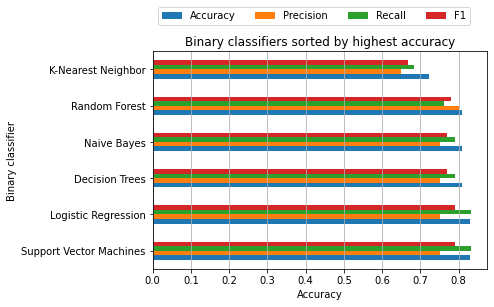

<Figure size 720x864 with 0 Axes>

In [69]:
#* TODO - maybe this would be good for Plotly express or Streamlit for interaction

# Set to horizontal bar chart
ax = df_model_sort_by_accuracy.plot.barh()

# Create legend
ax.legend(
    ncol = len(models.keys() ), 
    bbox_to_anchor = (0, 1.1), 
    loc = 'lower left', 
    prop = {'size': 10}
)

# Add grid lines
ax.xaxis.grid(True, which = 'major')

# Add labels, change size
plt.title('Binary classifiers sorted by highest accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Binary classifier')
plt.figure(figsize = (10,12) )
plt.tight_layout()

# SAVE FOR LATER ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [70]:
# # Split the CDR into multiclass groups denoting the severity of the dementia
# df['CDR'] = df['CDR'].apply(
#     lambda x: 'non-demented' if x == 0.0 else (
#         'very mild dementia' if x == 0.5 else(
#             'mild dementia' if x == 1 else(
#                 'moderate dementia' if x == 2 else 'unknown'))))

# FUTURE WORK
Hypertuning? Grid search CV
AUC?
sensitivity vs specificity?
MMSE VS CDR?
age VS CDR?
FEATURE importance
graph predictions vs actual?

NEXT:
- Streamlit for later 5/16
- can drop multiclass and drop hypertuning

Final Report
- for people to read, very detailed
- no code
- mainly text, graphs are fine